<a href="https://colab.research.google.com/github/GalchynskaSofiia/Machine_learning-/blob/main/%D0%9B%D0%A03_%D0%93%D0%B0%D0%BB%D1%8C%D1%87%D0%B8%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 3. Лінійна регресія. Частина 1. Варіант 4**

Автор: Гальчинська Софія Володимирівна ФІТ 4-8

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Завдання 1.** Завантажити Diabetes Dataset. Саме такого датасету, як описано в лабораторній роботі, не було знайдено, тож використано аналогічний датасет. Датасет було отримано з Kaggle за посиланням: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [2]:
import kagglehub
import os
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


1. Вивести перших 5 рядків.

In [3]:
df = pd.read_csv(os.path.join(path, "diabetes_prediction_dataset.csv"))
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.

In [4]:
df.isnull().sum()  #оскільки число пропусків 0, то нічого не замінюємо.

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [5]:
df.duplicated().sum()

np.int64(3854)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum() #ще раз перевярємо число дулікатів, тепер їх немає.

np.int64(0)

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.

In [8]:
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [9]:
df = df[df['gender'] != 'Other'] #видаляємо рядки з гендером "Other"

In [10]:
df['gender'].value_counts() #ще раз перевярємо, чи немає унікальних значень. Бачимо, що тепер є тільки чоловіки і жінки.

,count
gender,
Female,56161
Male,39967


In [11]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [12]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


5. Перевірити тип даних. При необхідності замінити тип даних на
числовий.

In [13]:
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


Всі колонки мають числовий тип даних, окрім історії куріння. Проте, на мою думку, дана колонка не потрібна для дослідження, тож її видаляємо.

In [14]:
df.drop(columns=['smoking_history'], axis=1, inplace=True)

6. Обчислити кореляцію між прогресом діабету і іншими ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.

In [15]:
df.corr(numeric_only=True)['diabetes'].sort_values(ascending=False)

,diabetes
diabetes,1.000000
blood_glucose_level,0.424366
HbA1c_level,0.406446
age,0.264918
bmi,0.214951
hypertension,0.195696
heart_disease,0.170701
gender,-0.037837


Після обчислення кореляції можна зробити певні висновки. Бачимо, що найвищі показники кореляції з діабетом у рівень глюкози у крові (blood_glucose_level) і глікогемоглобіна (HbA1c_level). Так відбувається оскільки це основні показники при виявлені діабету. Далі ідуть показники - вік і індекс маси тіла, що відчить про те, що чим старша і повніша людина, тим більше у неї вірогідності розвитку діабету. Незначна, проте позитивна кореляція присутня у таких показників, як гіпертонія та захворювання серця, що означає те, що люди з даними захворюваннями мають більше шансів захворіти діабетом. Стать бачимо, що абсолютно ніяк не впливає на діабет.

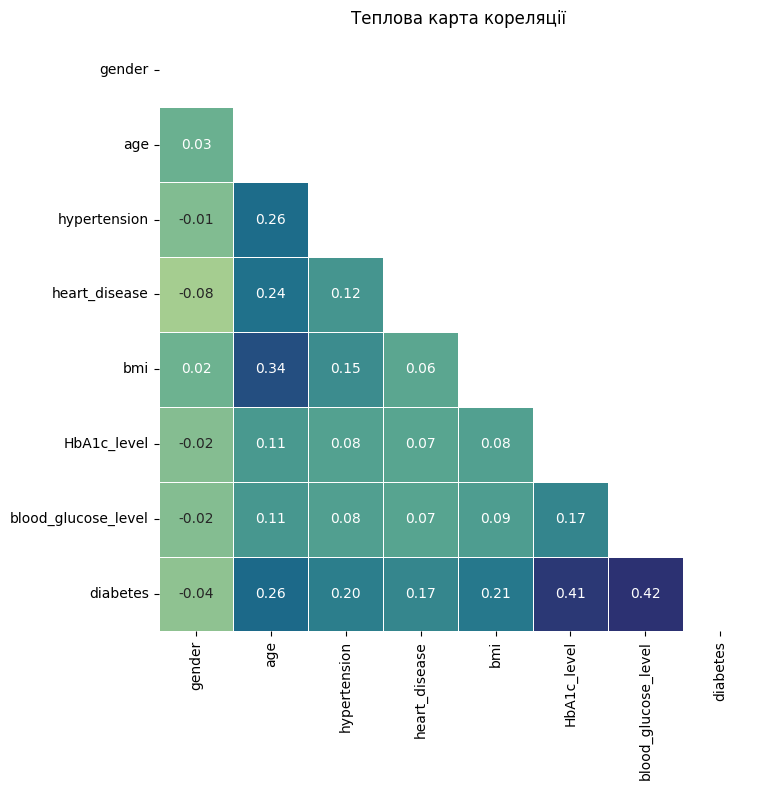

In [16]:
mtx = df.corr(numeric_only=True)
plt.figure(figsize=(8, 8))
sns.heatmap(
    mtx,
    annot=True,
    cmap="crest",
    fmt=".2f",
    linewidths=0.5,
    mask = np.triu(np.ones_like(mtx, dtype=bool)),
    square=True,
    cbar=False,
)

plt.title("Теплова карта кореляції")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

7. Масштабувати ознаки.

In [18]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Поділити дані на тренувальну і тестову вибірки.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Розмір тренувальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)

Розмір тренувальної вибірки: (76902, 7)
Розмір тестової вибірки: (19226, 7)


9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).

10. Вивести коефіцієнт детермінації (R2) і середньоквадратичну помилку (MSE).

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    'Random Forest': RandomForestRegressor()
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.352 | MAE: 0.157 | MSE: 0.052
[Random Forest] R²: 0.664 | MAE: 0.050 | MSE: 0.027


У даному випадку моя цільова змінна 'diabetes' — бінарна (приймає значення 0 або 1), тому дані метрики дають лише числове уявлення про помилку, доцільніше буде використовувати класифікаційні моделі, а не моделі регресії.

Якщо ж порівнювати між собою моделі лінійної регресії і випадкового лісу, то друга значно краще підходить для даних цього датасету, оскільки вона показує 66% даних (R²: 0.664) і середня абсолютна і середня квадратична похибки тут менше, ніж у моделі лінійної регресії.

11. Побудувати графіки.

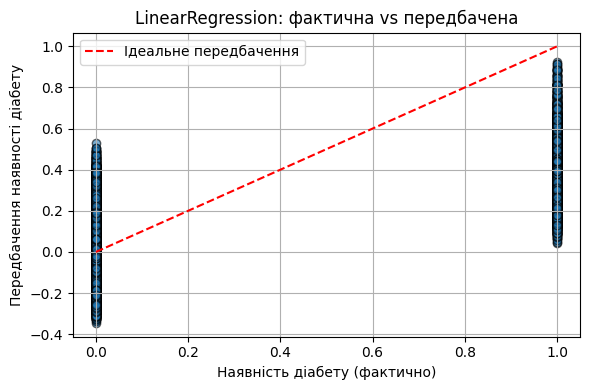

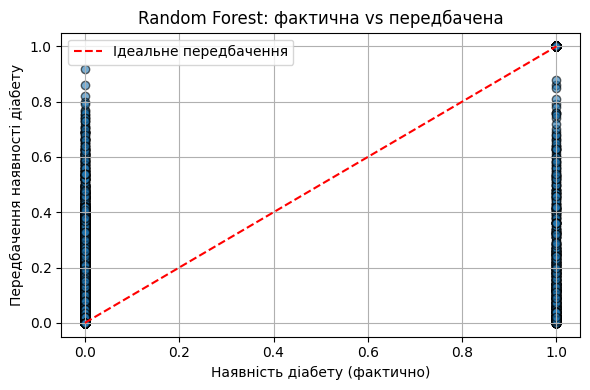

In [23]:
for name, res in results.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, res["y_pred"], alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', label='Ідеальне передбачення')

    plt.xlabel("Наявність діабету (фактично)")
    plt.ylabel("Передбачення наявності діабету")
    plt.title(f"{name}: фактична vs передбачена")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Дані графіки ще раз підверджують, що для даного датасету, де цільова змінна - бінарна, не доцільно застосовувати регресію, тут необхідна задача класифікації. Так сталось, оскільки для даної лабораторної роботи не було знайдено необхідного датасету, що описаний в завданні лабораторної роботи, тож взято альтернативний датасет з Kaggle (це зазначено на початку лабораторної роботи).

12. Вивести справжні і прогнозовані значення.

In [24]:
for name, res in results.items():
    df_compare = pd.DataFrame({
        "Фактичне": y_test,
        "Прогнозоване": res["y_pred"]
    })

    print(f"\n{name} — фактичне vs прогнозоване:")
    print(df_compare.head(10))


LinearRegression — фактичне vs прогнозоване:
       Фактичне  Прогнозоване
699           1      0.219839
66105         0      0.044077
57599         0      0.138817
32888         0      0.029498
64385         0      0.187877
61072         0     -0.023591
48970         0     -0.026998
17719         0      0.118154
26862         0      0.146706
32580         0      0.124640

Random Forest — фактичне vs прогнозоване:
       Фактичне  Прогнозоване
699           1      0.020000
66105         0      0.000000
57599         0      0.000000
32888         0      0.000000
64385         0      0.010000
61072         0      0.000000
48970         0      0.000000
17719         0      0.000000
26862         0      0.000000
32580         0      0.018333


**Висновки:** Отже, під час виконання даного завдання лабораторної роботи було проведено попередній аналіз даних, зокрема: перевірено наявність пропусків і дублікатів, дублікати видалено, бінарна ознака гендеру приведена до числового формату 0 або 1, а всі типи даних переведено у числові для подальшого аналізу. Кореляційний аналіз показав, що найсильніший вплив на наявність діабету мають рівень глюкози в крові (blood_glucose_level) та глікогемоглобін (HbA1c), тоді як інші ознаки, такі як вік, індекс маси тіла, наявність гіпертензії чи серцевих захворювань, мають менший, але все ж відчутний вплив. Натомість стать практично не впливає на цільову змінну і має від'ємний показник кореляції.

Масштабування ознак і поділ даних на тренувальну та тестову вибірки дозволили побудувати моделі лінійної регресії та випадкового лісу. За результатами побудови моделей бачимо, що модель випадкового лісу показала значно кращу здатність прогнозувати наявність діабету, порівняно з лінійною регресією, яка мала менший показник детермінації і більші середню квадратичну і середню абсолютну помилки. Графіки прогнозованих значень показали, що через те, що цільова змінна є бінарною, для даного типу задач краще використовувати класифікаційні моделі.